<a href="https://colab.research.google.com/github/okonp07/-Scrapping-S-P-Historic-Stock-Price-Data-from-the-Internet-using-yfinance-in-Python-/blob/main/Blackfaces_filtered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
from datasets import load_dataset

ds = load_dataset("HuggingFaceM4/FairFace", "0.25")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.89k [00:00<?, ?B/s]

(…)-00000-of-00002-d405faba4f4b9b85.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

(…)-00001-of-00002-dd3cb68164727418.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

(…)-00000-of-00001-951dbd63c8724ee1.parquet:   0%|          | 0.00/63.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/86744 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10954 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset

ds = load_dataset("HuggingFaceM4/FairFace", "1.25")

(…)-00000-of-00004-e715178553977907.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

(…)-00001-of-00004-f38b58e3987f3fbf.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

(…)-00002-of-00004-239e931aa9c3b3e6.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

(…)-00003-of-00004-847c279691a19548.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

(…)-00000-of-00001-09e3e67bb00ab4ec.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/86744 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10954 [00:00<?, ? examples/s]

In [ ]:
# Check the first few rows of the dataset to understand its structure
print(ds)


DatasetDict({
    train: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 86744
    })
    validation: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 10954
    })
})


In [ ]:
# Check unique values in the "race" column to confirm correct filtering
print("Unique races in the train dataset:")
print(set(ds['train']['race']))

print("\nUnique races in the validation dataset:")
print(set(ds['validation']['race']))


Unique races in the train dataset:
{0, 1, 2, 3, 4, 5, 6}

Unique races in the validation dataset:
{0, 1, 2, 3, 4, 5, 6}


In [ ]:
# Filter for Black faces in both train and validation sets (race = 2)
black_faces_train = ds['train'].filter(lambda x: x['race'] == 2)
black_faces_val = ds['validation'].filter(lambda x: x['race'] == 2)

# Check the number of Black faces in both sets
print(f"Number of Black faces in train set: {len(black_faces_train)}")
print(f"Number of Black faces in validation set: {len(black_faces_val)}")

Filter:   0%|          | 0/86744 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10954 [00:00<?, ? examples/s]

Number of Black faces in train set: 12233
Number of Black faces in validation set: 1556


In [ ]:
# Check the structure of a single example from the filtered dataset
sample = black_faces_train[0]  # Change index for a different example
print("Sample data structure:", sample)

# Check the keys in the dataset
print("Dataset keys (columns):", black_faces_train.column_names)

# Check the type of the 'image' field
print("Type of image field:", type(sample['image']))

# Check the type of the 'age', 'gender', and 'race' fields
print("Type of 'age' field:", type(sample['age']))
print("Type of 'gender' field:", type(sample['gender']))
print("Type of 'race' field:", type(sample['race']))

# Display the first few samples from the dataset
for idx, example in enumerate(black_faces_train.select(range(5))):  # Change range to show more samples
    print(f"Example {idx}:")
    print(f"  Image Type: {type(example['image'])}")
    print(f"  Age: {example['age']}")
    print(f"  Gender: {example['gender']}")
    print(f"  Race: {example['race']}")
    print()


Sample data structure: {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x448 at 0x7D460016C550>, 'age': 1, 'gender': 1, 'race': 2, 'service_test': False}
Dataset keys (columns): ['image', 'age', 'gender', 'race', 'service_test']
Type of image field: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Type of 'age' field: <class 'int'>
Type of 'gender' field: <class 'int'>
Type of 'race' field: <class 'int'>
Example 0:
  Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
  Age: 1
  Gender: 1
  Race: 2

Example 1:
  Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
  Age: 0
  Gender: 1
  Race: 2

Example 2:
  Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
  Age: 3
  Gender: 1
  Race: 2

Example 3:
  Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
  Age: 4
  Gender: 1
  Race: 2

Example 4:
  Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
  Age: 3
  Gender: 1
  Race: 2



In [ ]:
# Define directory in Google Drive to save the images and metadata
base_dir = "/content/drive/MyDrive/black_faces"  # Folder where both images and metadata will be saved
image_dir = os.path.join(base_dir, "images")  # Subdirectory for images
metadata_file = os.path.join(base_dir, "metadata.csv")  # Metadata CSV file path

# Create the base directory and image directory in Google Drive if they don't exist
os.makedirs(image_dir, exist_ok=True)

# Prepare metadata list
metadata = []

# Loop through the dataset and save images with metadata
for idx, example in enumerate(black_faces_train):
    # Get the image and metadata
    image = example['image']
    age = example['age']
    gender = example['gender']
    race = example['race']
    service_test = example['service_test']

    # Save the image with a unique name (e.g., image_0.jpg, image_1.jpg, ...)
    image_path = os.path.join(image_dir, f"image_{idx}.jpg")
    image.save(image_path)

    # Append metadata to the list
    metadata.append({
        "image_name": f"image_{idx}.jpg",
        "age": age,
        "gender": gender,
        "race": race,
        "service_test": service_test
    })

# Save metadata to CSV in Google Drive
metadata_df = pd.DataFrame(metadata)
metadata_df.to_csv(metadata_file, index=False)

print(f"Images saved in {image_dir}")
print(f"Metadata saved in {metadata_file}")


Images saved in /content/drive/MyDrive/black_faces/images
Metadata saved in /content/drive/MyDrive/black_faces/metadata.csv


In [ ]:
# Inspect unique race values in the 'train' and 'validation' datasets
unique_races_train = ds['train'].unique('race')
unique_races_val = ds['validation'].unique('race')

print(f"Unique races in the train set: {unique_races_train}")
print(f"Unique races in the validation set: {unique_races_val}")


Unique races in the train set: [0, 1, 2, 3, 4, 5, 6]
Unique races in the validation set: [0, 3, 5, 6, 2, 1, 4]


In [ ]:
# Filter for Black faces in both train and validation sets (race = 2)
black_faces_train = ds['train'].filter(lambda x: x['race'] == 2)
black_faces_val = ds['validation'].filter(lambda x: x['race'] == 2)

# Check the number of Black faces in both sets
print(f"Number of Black faces in train set: {len(black_faces_train)}")
print(f"Number of Black faces in validation set: {len(black_faces_val)}")

# Show a sample image to confirm
sample_image = black_faces_train[0]['image']  # Pick the first image from the filtered dataset
sample_image.show()  # This will display the image

# Optionally, print some metadata for verification
print(f"Age: {black_faces_train[0]['age']}, Gender: {black_faces_train[0]['gender']}, Race: {black_faces_train[0]['race']}")


Number of Black faces in train set: 12233
Number of Black faces in validation set: 1556
Age: 1, Gender: 1, Race: 2


In [ ]:
# Display the first image from the filtered dataset
sample_image = black_faces_train[0]['image']  # Pick the first image from the filtered dataset
sample_image.show()  # This will display the image

# Optionally, print metadata for verification
print(f"Age: {black_faces_train[0]['age']}, Gender: {black_faces_train[0]['gender']}, Race: {black_faces_train[0]['race']}")


Age: 1, Gender: 1, Race: 2


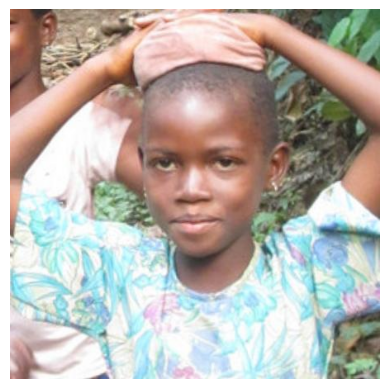

Age: 1, Gender: 1, Race: 2


In [ ]:
import matplotlib.pyplot as plt

# Get the first image from the filtered dataset
sample_image = black_faces_train[0]['image']

# Display the image using matplotlib
plt.imshow(sample_image)
plt.axis('off')  # Turn off axis for a clean display
plt.show()

# Optionally, print metadata for verification
print(f"Age: {black_faces_train[0]['age']}, Gender: {black_faces_train[0]['gender']}, Race: {black_faces_train[0]['race']}")
